In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('E:\Thư mục mới\A_Z Handwritten Data\A_Z Handwritten Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

In [4]:
data = pd.read_csv('A_Z Handwritten Data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [6]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [7]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data[data.columns[0]].value_counts().sort_index(ascending=True)

0     13869
1      8668
2     23409
3     10134
4     11440
5      1163
6      5762
7      7218
8      1120
9      8493
10     5603
11    11586
12    12336
13    19010
14    57825
15    19341
16     5812
17    11566
18    48419
19    22495
20    29008
21     4182
22    10784
23     6272
24    10859
25     6076
Name: 0, dtype: int64

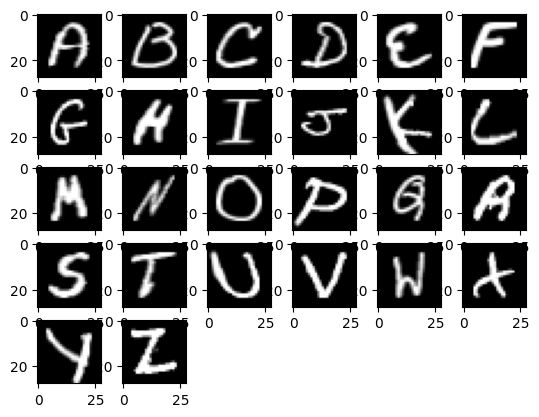

In [9]:
for i in range(26):
    dd = data[data['0']==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    im = plt.subplot(5, 6, i+1)
    im.imshow(x, cmap='gray')

In [10]:
def detect_identical_borders(vect_image, dim):
    np_image = np.reshape(vect_image, dim)
    height, width = np_image.shape
    tolerance = 100

    # Détection de la bordure supérieure identique
    top_border = np.where(~np.all(np.isclose(np_image[0], np_image, atol=tolerance), axis=1))[0][0]

    # Détection de la bordure inférieure identique
    bottom_border = np.where(~np.all(np.isclose(np_image[height - 1], np_image, atol=tolerance), axis=1))[0][-1]

    # Détection de la bordure gauche identique
    left_border = np.where(~np.all(np.isclose(np_image[:, 0], np_image, atol=tolerance), axis=0))[0][0]

    # Détection de la bordure droite identique
    right_border = np.where(~np.all(np.isclose(np_image[:, width - 1], np_image, atol=tolerance), axis=0))[0][-1]

    return [left_border, top_border, right_border, bottom_border]

In [11]:
borders = np.apply_along_axis(detect_identical_borders, 1, data.iloc[:, 1:].values, (28, 28))
mean_borders = np.mean(borders, axis=0).astype(int)
mean_borders

array([ 4,  4, 22, 22])

In [12]:
data.shape

(372450, 785)

In [13]:
data_array = data.to_numpy()

matrix = np.reshape(data_array[:, 1:], (data_array.shape[0], 28, 28))

cropped_matrix = matrix[:, mean_borders[1]:mean_borders[3]+1, mean_borders[0]:mean_borders[2]+1]

for i, cm in enumerate(cropped_matrix):
    im = Image.fromarray(cm.astype(np.uint8))
    im = im.filter(ImageFilter.SMOOTH)
    cropped_matrix[i] = np.array(im)

cropped_vectors = np.reshape(cropped_matrix, (cropped_matrix.shape[0], -1))

data2 = np.column_stack((data_array[:, 0], cropped_vectors))


data2.shape

(372450, 362)

In [14]:
data2 = pd.DataFrame(data2, columns=None)

In [15]:
data2.shape

(372450, 362)

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 362 entries, 0 to 361
dtypes: int64(362)
memory usage: 1.0 GB


In [17]:
data2.describe()

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
count,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,2.680609,5.693919,8.009271,10.528734,13.598070,17.381686,22.336155,28.563109,35.960234,...,109.804197,103.170681,94.676622,84.064575,71.977095,59.034552,45.753435,33.214096,22.295076,13.045496
std,6.740824,20.452091,31.501142,36.394227,41.315288,46.294017,51.770934,58.140098,65.169357,72.540293,...,115.552620,113.398871,110.341752,106.261346,100.927705,94.094170,85.352608,74.805416,62.754942,48.958495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,47.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,255.000000,248.000000,230.000000,208.000000,164.000000,107.000000,38.000000,0.000000,0.000000,0.000000
max,25.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [18]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
0,0,0,0,0,0,0,0,0,0,0,...,0,0,152,255,255,89,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,81,204,149,15,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,80,180,101,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,85,244,255,184


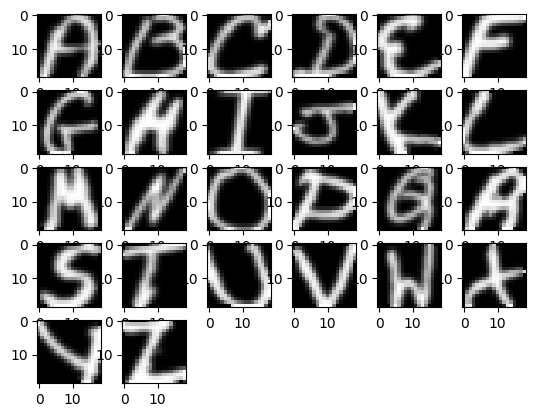

In [19]:

for i in range(26):
    dd = data2[data2[0]==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((19, 19))
    im = plt.subplot(5, 6, i+1)
    im.imshow(x, cmap='gray')

In [20]:
X = data2.iloc[:, 1:].values
y = data2.iloc[:, 0].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf = clf.fit(X_train, y_train)
clf.score (X_test, y_test)

0.9887233185662505

In [24]:
# Kiểm tra kích thước của dữ liệu hình ảnh
print(X_train.shape[1])  # Số lượng pixel trong mỗi hình ảnh


361


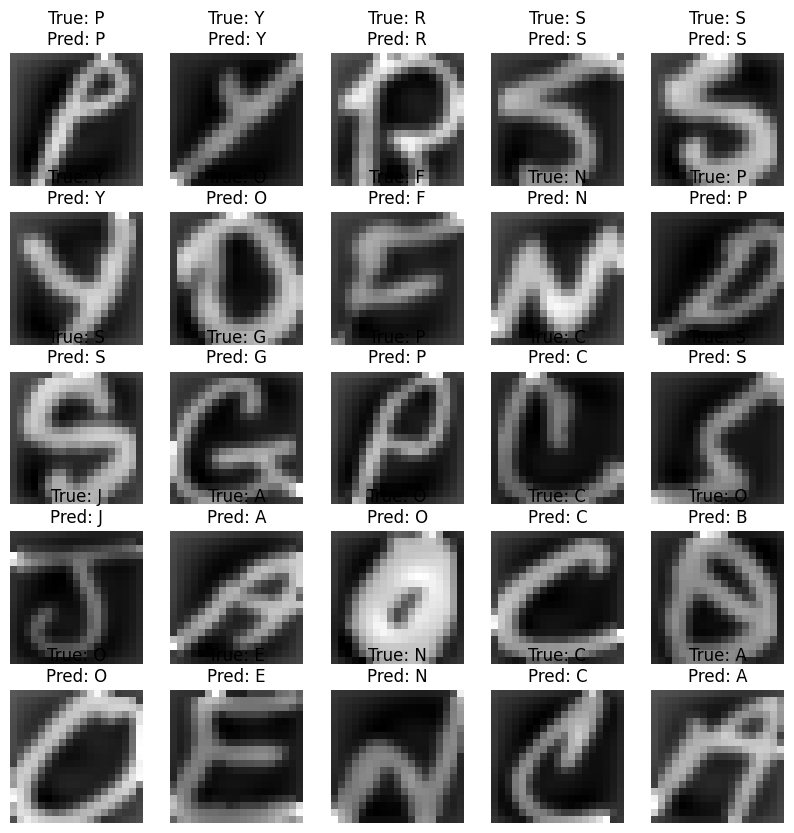

In [25]:
import matplotlib.pyplot as plt

# Dự đoán nhãn cho tập kiểm tra
y_pred = clf.predict(X_test)

# Hàm chuyển đổi nhãn số thành chữ cái
def number_to_letter(number):
    return chr(number + ord('A'))

# Chuyển đổi nhãn số thành chữ cái
y_test_letters = [number_to_letter(y) for y in y_test]
y_pred_letters = [number_to_letter(y) for y in y_pred]

# Hiển thị một số hình ảnh chữ viết tay cùng với chữ cái dự đoán và chữ cái thực tế
def plot_images(images, true_labels, pred_labels, num_images):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].reshape(19, 19), cmap='gray')  # Sử dụng kích thước 19x19
        plt.title(f'True: {true_labels[i]}\nPred: {pred_labels[i]}')
        plt.axis('off')
    plt.show()

# Chọn một số hình ảnh ngẫu nhiên từ tập kiểm tra
num_images_to_display = 25
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)
sample_images = X_test[random_indices]
sample_labels = [y_test_letters[i] for i in random_indices]
sample_predictions = [y_pred_letters[i] for i in random_indices]

plot_images(sample_images, sample_labels, sample_predictions, num_images_to_display)


In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf = clf.fit(X_train, y_train)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


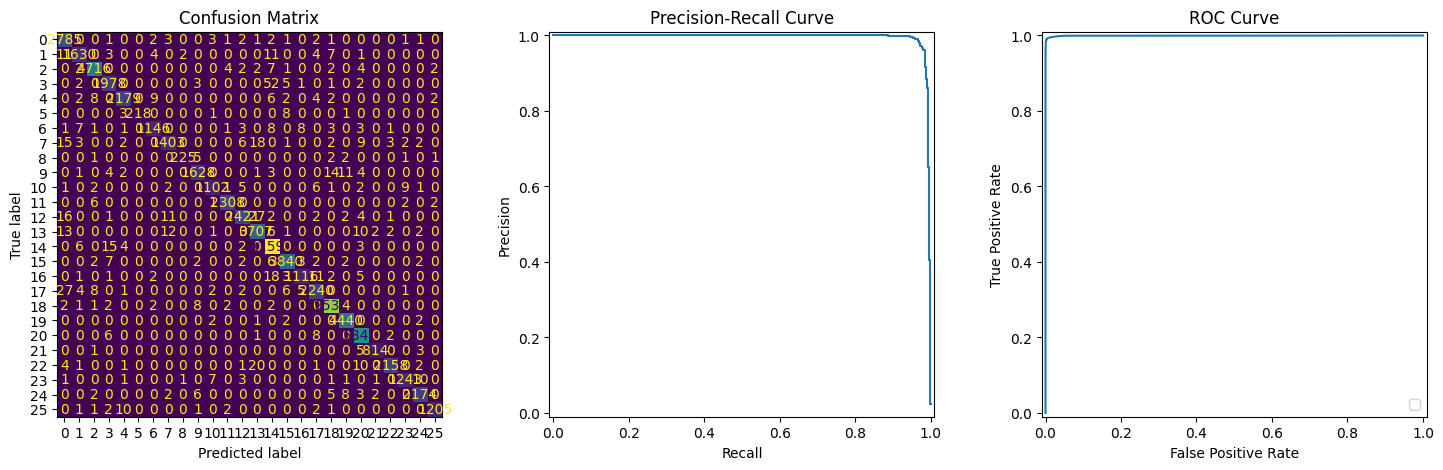

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=clf.classes_[1])
disp_pr = PrecisionRecallDisplay(precision=precision, recall=recall)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=clf.classes_[1])
disp_roc = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot all together
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
disp_cm.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Confusion Matrix')
disp_pr.plot(ax=axes[1])
axes[1].set_title('Precision-Recall Curve')
disp_roc.plot(ax=axes[2])
axes[2].set_title('ROC Curve')

plt.show()
